<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:black;
              text-align:center;'>
        TWITTER SENTIMENT ANALYSIS
    </h2>
    </div>

### Importing all the required libraries

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
import joblib

### Loading data in CSV file

In [11]:
df = pd.read_csv("twitterdata.csv")

### Some Quick information about data

In [12]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [13]:
df.tail()

,target,ids,date,flag,user,text
1994,1,1468280681,Tue Apr 07 00:43:16 PDT 2009,NO_QUERY,chomma,@roxy_yeah yep a loser.
1995,1,1468280970,Tue Apr 07 00:43:22 PDT 2009,NO_QUERY,EvilSue,and finito! All bathroom contractors been thru...
1996,1,1468281170,Tue Apr 07 00:43:26 PDT 2009,NO_QUERY,lexikitty,@caitlinaudrey awww! that sucks! are you goin...
1997,1,1468281205,Tue Apr 07 00:43:29 PDT 2009,NO_QUERY,terrajen,"Sorry, SF. Rescheduling my SF trip for this co..."
1998,0,1468281484,Tue Apr 07 00:43:33 PDT 2009,NO_QUERY,MonBon_,2morw I get my blasted wisdom teeth pulled! N...


In [14]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [15]:
df.shape

(1999, 6)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  1999 non-null   int64 
 1   ids     1999 non-null   int64 
 2   date    1999 non-null   object
 3   flag    1999 non-null   object
 4   user    1999 non-null   object
 5   text    1999 non-null   object
dtypes: int64(2), object(4)
memory usage: 93.8+ KB


<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:skyblue;
            font-size:75%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 10px;
              color:black;
              text-align:center;'>
        Data Preprocessing
    </h2>
    </div>

### Null values percentage of each columns

There are no null values

In [17]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [18]:
df['target'].nunique()

2

In [19]:

df.columns = ['target', 'ids', 'timestamp', 'query', 'user', 'text']

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:skyblue;
            font-size:75%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 10px;
              color:black;
              text-align:center;'>
        EDA (Exploratory Data Analysis)
    </h2>
    </div>

<Axes: xlabel='target', ylabel='count'>

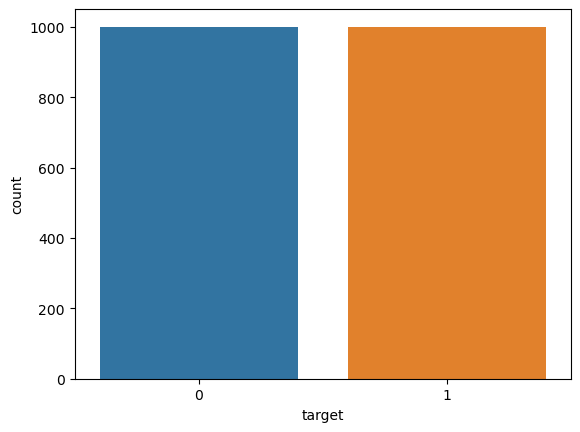

In [20]:

sns.countplot(x='target', data=df)

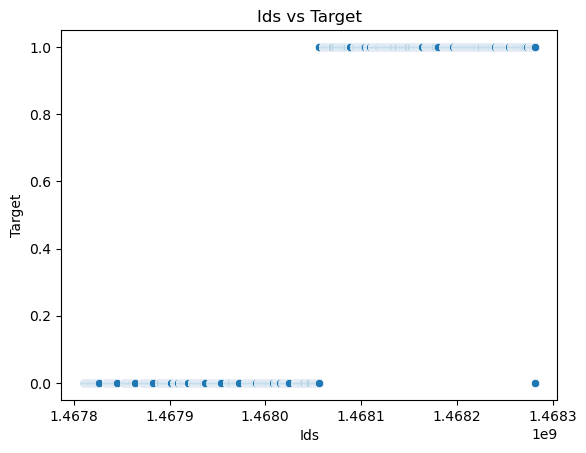

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='ids', y='target', data=df)
plt.title('Ids vs Target')
plt.xlabel('Ids')
plt.ylabel('Target')
plt.show()


C:\Users\KIIT\anaconda3\Lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


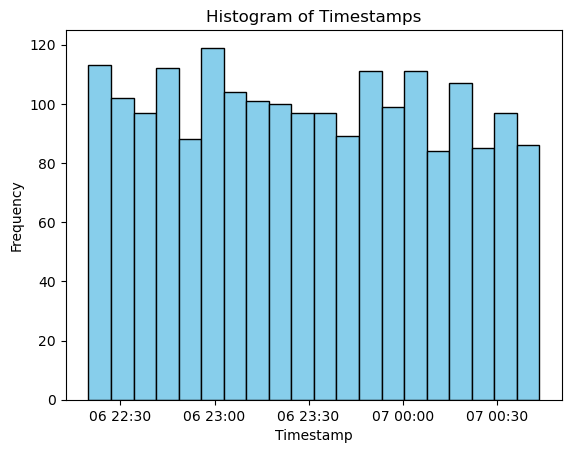

In [22]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot histogram
plt.hist(df['timestamp'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Timestamps')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

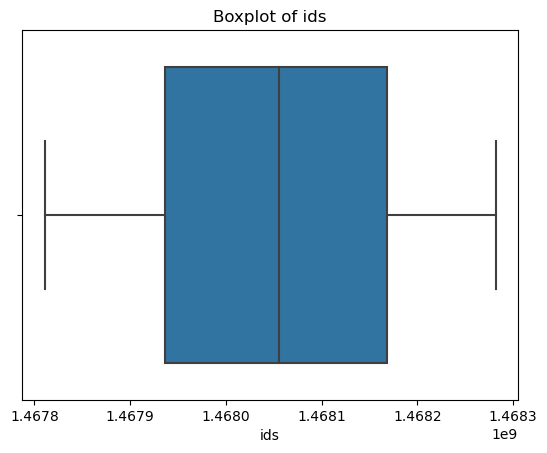

In [23]:
import seaborn as sns

numerical_cols = ['ids']

for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


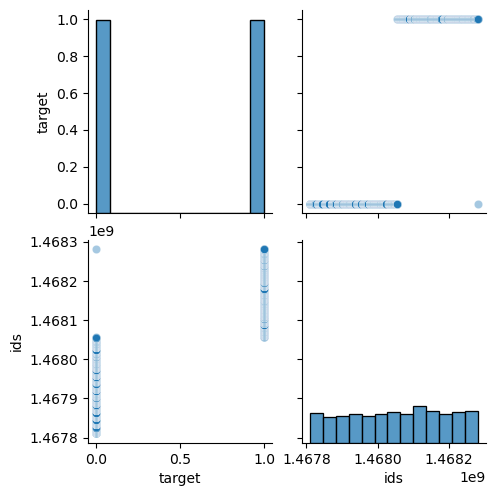

In [24]:
sns.pairplot(df, kind='scatter', plot_kws={'alpha': 0.4})

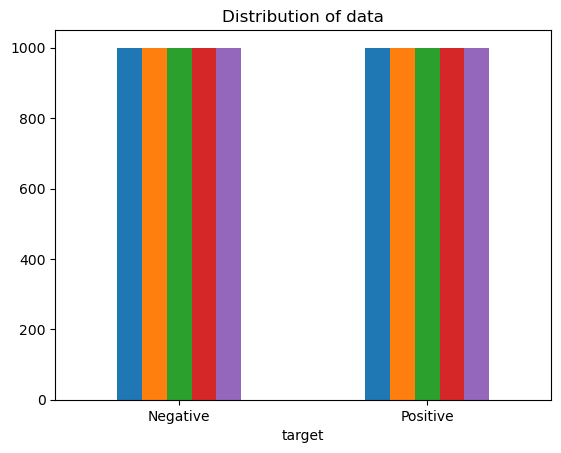

In [25]:
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
text, sentiment = list(df['text']), list(df['target'])

# Cleaning and PreProcessing

In [26]:
data=df[['text','target']]

In [27]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [28]:
dataset = pd.concat([data_pos, data_neg])

In [29]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

995     @t_wolfe  i miss u too. i'm totally comin back...
996     @sniffinglue ohhh. i love it. ps i'm sad we di...
997             and somehow i still end up in this place 
998            @kisluvkis oh that is very sad, poor boy. 
1998    2morw  i get my blasted wisdom teeth pulled! n...
Name: text, dtype: object

In [30]:
wordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [31]:
STOPWORD = set(["a", "an", "the", "and", "but", "if", "or", "because", "as", "what", "which", "this", "that", "these", "those", "then", "just", "so", "than", "such", "both", "neither", "either", "no", "not", "only", "also", "now", "here", "there", "when", "where", "why", "how", "all", "any", "each", "few", "more", "most", "other", "some", "such", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORD])

dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))


In [32]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

995     twolfe i miss u too im totally comin back tho ...
996     sniffinglue ohhh i love it ps im sad we didnt ...
997                       somehow i still end up in place
998                          kisluvkis oh is sad poor boy
1998    2morw i get my blasted wisdom teeth pulled nee...
Name: text, dtype: object

In [33]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

995     twolfe i miss u too im totally comin back tho ...
996     sniffinglue ohhh i love it ps im sad we didnt ...
997                       somehow i still end up in place
998                          kisluvkis oh is sad poor boy
1998    2morw i get my blasted wisdom teeth pulled nee...
Name: text, dtype: object

In [34]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

995     twolfe i miss u too im totally comin back tho ...
996     sniffinglue ohhh i love it ps im sad we didnt ...
997                       somehow i still end up in place
998                          kisluvkis oh is sad poor boy
1998    2morw i get my blasted wisdom teeth pulled nee...
Name: text, dtype: object

In [35]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

995     twolfe i miss u too im totally comin back tho ...
996     sniffinglue ohhh i love it ps im sad we didnt ...
997                       somehow i still end up in place
998                          kisluvkis oh is sad poor boy
1998    morw i get my blasted wisdom teeth pulled need...
Name: text, dtype: object

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:skyblue;
            font-size:75%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 10px;
              color:black;
              text-align:center;'>
        Machine Learning Implementation
    </h2>
    </div>

In [36]:
X=df.text
y=df.target

In [91]:

def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=26105111)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [92]:
# Support Vector Machine (SVM)
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [93]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [94]:
# Naive Bayes (GaussianNB)
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train.toarray(), y_train)
y_pred_naive_bayes = naive_bayes_model.predict(X_test.toarray())


<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:skyblue;
            font-size:75%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 10px;
              color:black;
              text-align:center;'>
        Model Evaluation
    </h2>
    </div>

In [95]:
print("\nSupport Vector Machine (SVM):")
mse_svm, rmse_svm, mae_svm, r2_svm = calculate_metrics(y_test, y_pred_svm)
print("MSE:", mse_svm)
print("RMSE:", rmse_svm)
print("MAE:", mae_svm)
print("R2 Score:", r2_svm)


Support Vector Machine (SVM):
MSE: 0.2252624704890506
RMSE: 0.47461823657446056
MAE: 0.4559164470104424
R2 Score: 0.09858955386534363


In [96]:
print("Logistic Regression:")
mse_logistic, rmse_logistic, mae_logistic, r2_logistic = calculate_metrics(y_test, y_pred_logistic)
print("MSE:", mse_logistic)
print("RMSE:", rmse_logistic)
print("MAE:", mae_logistic)
print("R2 Score:", r2_logistic)

Logistic Regression:
MSE: 0.41
RMSE: 0.6403124237432849
MAE: 0.41
R2 Score: -0.6406562625050023


In [97]:
print("\nNaive Bayes (GaussianNB):")
mse_naive_bayes, rmse_naive_bayes, mae_naive_bayes, r2_naive_bayes = calculate_metrics(y_test, y_pred_naive_bayes)
print("MSE:", mse_naive_bayes)
print("RMSE:", rmse_naive_bayes)
print("MAE:", mae_naive_bayes)
print("R2 Score:", r2_naive_bayes)



Naive Bayes (GaussianNB):
MSE: 0.43
RMSE: 0.6557438524302001
MAE: 0.43
R2 Score: -0.7206882753101245


## Confusion Matrix

In [98]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("twitterdata.csv")

df.columns = ['target', 'ids', 'timestamp', 'query', 'user', 'text']

df['timestamp'] = pd.to_datetime(df['timestamp'])

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['text'] = df['text'].apply(clean_text)

X = df['text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

def model_evaluate(model, model_name):
    y_pred = model.predict(X_test_transformed)
    
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    
    cm_percent = np.round(cm / cm.sum(axis=1)[:, np.newaxis] * 100, 2)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_percent, annot=True, cmap="Blues", fmt="g", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


C:\Users\KIIT\anaconda3\Lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.55      0.53      0.54       207
           1       0.51      0.53      0.52       193

    accuracy                           0.53       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.53      0.53      0.53       400



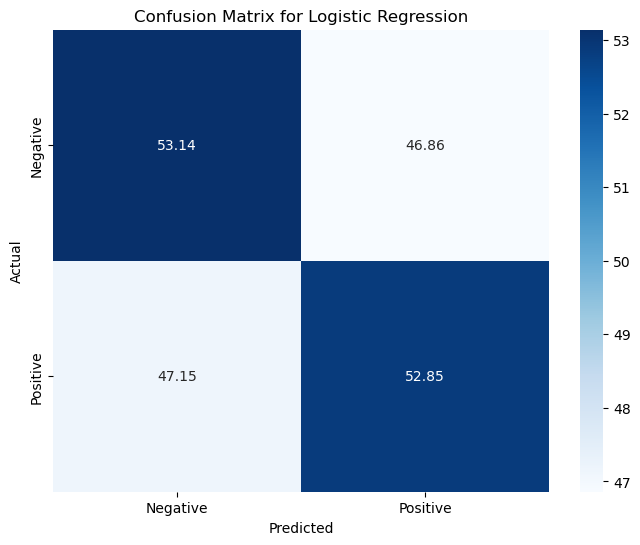

In [99]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_transformed, y_train)
model_evaluate(log_reg, "Logistic Regression")


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.54      0.54      0.54       207
           1       0.51      0.50      0.50       193

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.52      0.52      0.52       400



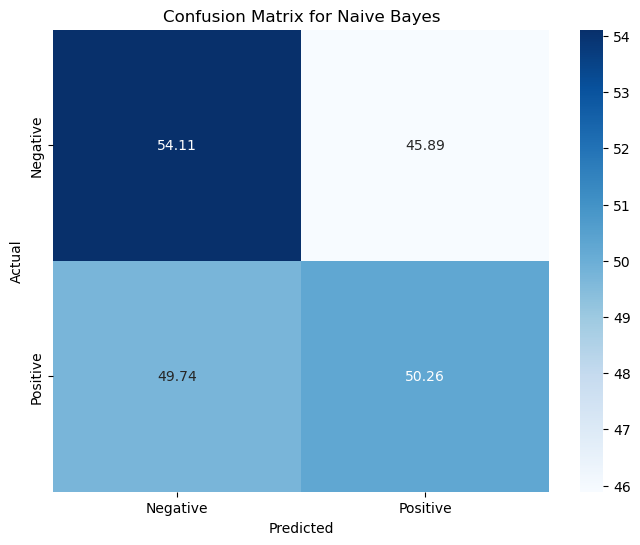

In [100]:
# Naive Bayes
nb = BernoulliNB()
nb.fit(X_train_transformed, y_train)
model_evaluate(nb, "Naive Bayes")


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       207
           1       0.51      0.51      0.51       193

    accuracy                           0.53       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.53      0.53      0.53       400



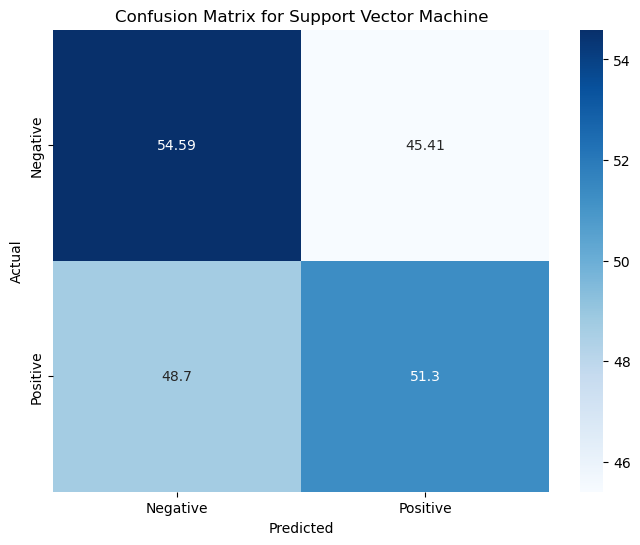

In [101]:
# Support Vector Machine
svm = LinearSVC()
svm.fit(X_train_transformed, y_train)
model_evaluate(svm, "Support Vector Machine")

### Concluding best model

In [110]:
print("From above analysis we can conclude that SVM is the best model for this dataset to predict most accurate price with Lowest MSE and Highest R2 score. ")

From above analysis we can conclude that SVM is the best model for this dataset to predict most accurate price with Lowest MSE and Highest R2 score. 


### Saving the Model

In [88]:
joblib.dump(best_model, 'BestModel.pkl')

['BestModel.pkl']